Paramètres ajustés : A = 1.11e+35, gamma = -0.212


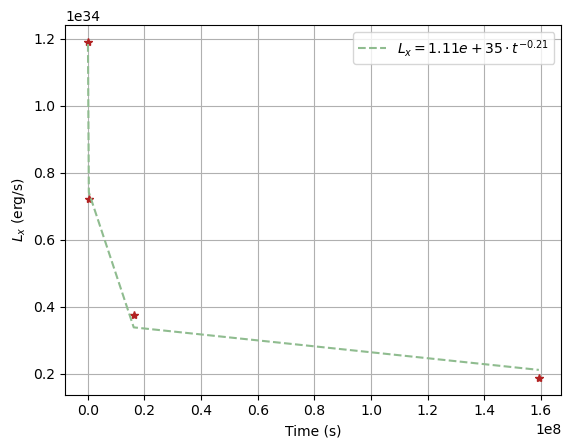

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from datetime import datetime

# Date de début d'observation :
date0 = datetime(2019, 8, 14, 0, 0, 0) # Temps de référence : 2019-08-14 00:00:00 (choisi arbitrairement)
date1 = datetime(2019, 8, 14, 10, 7, 15) # 2019-08-14 10:07:15
date2 = datetime(2019, 8, 18, 2, 58, 7) # 2019-08-18 02:58:07
date3 = datetime(2020, 2, 17, 12, 20, 44) # 2020-02-17 12:20:44
date4 = datetime(2024, 8, 30, 2, 41, 31) # 2024-08-30 02:41:31

delta01 = date1 - date0
delta02 = date2 - date0
delta03 = date3 - date0
delta04 = date4 - date0

t1 = delta01.total_seconds() # secondes
t2 = delta02.total_seconds() # secondes
t3 = delta03.total_seconds() # secondes
t4 = delta04.total_seconds() # secondes

Time = np.array([t1, t2, t3, t4])  
Lx = np.array([1.19e34, 7.21e33, 3.76e33, 1.88e+33])  # Lx en erg/s

"""
def powerlaw(x, A, gamma): # y = A*x^gamma 
    return A * x**gamma

# Ajustement
params, covariance = curve_fit(powerlaw, Time, Lx, p0=[1.19e34, -5/3])
A_fit, gamma_fit = params

# Courbe ajustée
Lx_fit = powerlaw(Time, A_fit, gamma_fit)

print(f"Paramètres ajustés : A = {A_fit:.2e}, gamma = {gamma_fit:.3f}")

plt.figure()
plt.plot(Time, Lx, '*',color='firebrick')
plt.plot(Time, Lx_fit, '--', label=rf'$L_x = {A_fit:.2e} \cdot t^{{{gamma_fit:.2f}}}$', color='darkseagreen')
plt.xlabel('Time (s)')
plt.ylabel('$L_x$ (erg/s)')
plt.legend()
plt.grid(True)
plt.show()
"""

logTime = np.log(Time)
logLx = np.log(Lx)

def linear_model(x, a, b):  # y = a*x + b -> log-log = logA + gamma*log(t)
    return a * x + b

params_log, _ = curve_fit(linear_model, logTime, logLx)
gamma, logA = params_log
A = np.exp(logA)

print(f"Paramètres ajustés : A = {A:.2e}, gamma = {gamma:.3f}")

plt.figure()
plt.plot(Time, Lx, '*',color='firebrick')
plt.plot(Time, Lx_fit, '--', label=rf'$L_x = {A:.2e} \cdot t^{{{gamma:.2f}}}$', color='darkseagreen')
plt.xlabel('Time (s)')
plt.ylabel('$L_x$ (erg/s)')
plt.legend()
plt.grid(True)
plt.show()